In [1]:
import importlib.util
spec = importlib.util.spec_from_file_location("bltmat", "/Users/claudiopierard/WRF/bltmat.py")
blt = importlib.util.module_from_spec(spec)
spec.loader.exec_module(blt)

In [2]:
import numpy as np
import scipy as spy
import scipy.io as sio
import matplotlib.pyplot as plt
import scipy.optimize as optimization
%matplotlib inline
import datetime
#import matplotlib.dates as mdates

In [3]:
ceilo_color = '#F0F8FF'
h48_color = '#FBC0C0'
h24_color = '#defec8'

## Diciembre

- **Extraer datos**

In [4]:
month_avg = np.loadtxt('/Users/claudiopierard/WRF/Datos/promedios/dic_promedios.dat')

In [5]:
month_avg[:,0]

array([ 1002.308,   774.808,   701.923,   653.077,   612.308,   640.192,
         565.577,   634.423,   658.077,   800.   ,   802.885,  1014.423,
        1541.538,  1874.808,  2320.   ,  2389.423,  2444.423,  2303.654])

### 24h
##### Gráfica de ceilo en cada hora  y PBLH en coordenada más cercana al CCA

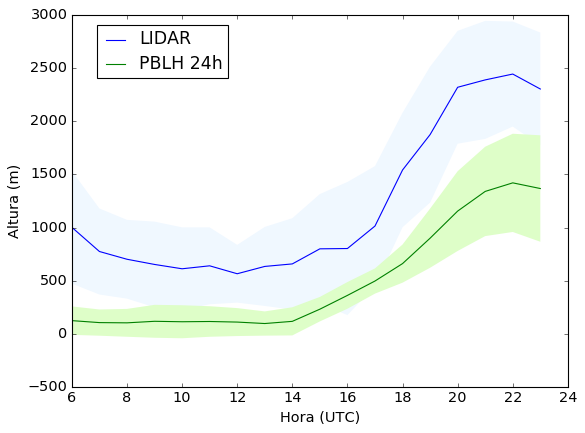

In [6]:
h_range= range(6,24)
plt.figure(figsize=(8,6))
#plt.plot(h_range, B)
plt.fill_between(h_range, month_avg[:,0] - month_avg[:,1], month_avg[:,0] + month_avg[:,1], facecolor='#F0F8FF', alpha=1.0, edgecolor='none')
plt.plot(h_range, month_avg[:,0], label = 'LIDAR')
plt.fill_between(h_range, month_avg[:,4] - month_avg[:,5], month_avg[:,4] + month_avg[:,5], facecolor= h24_color, alpha=1.0, edgecolor='none')
plt.plot(h_range, month_avg[:,4], c = 'g', label='PBLH 24h')
plt.ylabel('Altura (m)')
plt.xlabel('Hora (UTC)')
plt.legend(loc=(0.05,0.83))
plt.rcParams.update({'font.size': 13})

##### Gráfica de ceilo en pormediado en el intervalo  y PBLH coordenada más cercana al CCA

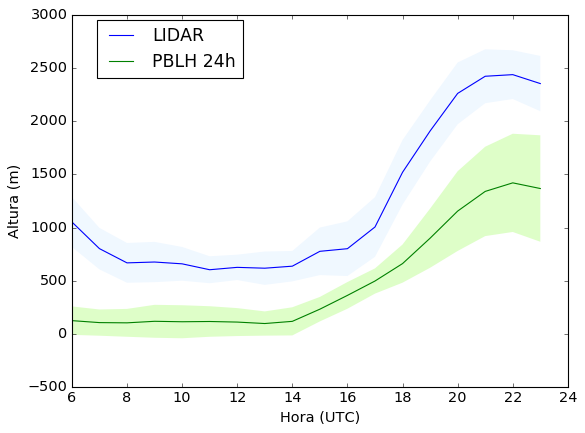

In [7]:
h_range= range(6,24)
plt.figure(figsize=(8,6))
#plt.plot(h_range, B)
plt.fill_between(h_range, month_avg[:,2] - month_avg[:,3], month_avg[:,2] + month_avg[:,3], facecolor='#F0F8FF', alpha=1.0, edgecolor='none')
plt.plot(h_range, month_avg[:,2], label = 'LIDAR')
plt.fill_between(h_range, month_avg[:,4] - month_avg[:,5], month_avg[:,4] + month_avg[:,5], facecolor= h24_color, alpha=1.0, edgecolor='none')
plt.plot(h_range, month_avg[:,4], c = 'g', label='PBLH 24h')
plt.ylabel('Altura (m)')
plt.xlabel('Hora (UTC)')
plt.legend(loc=(0.05,0.83))
plt.rcParams.update({'font.size': 13})

##### Gráfica de ceilo en hora y PBLH coordenada más cercana al CCA con promedio espacial

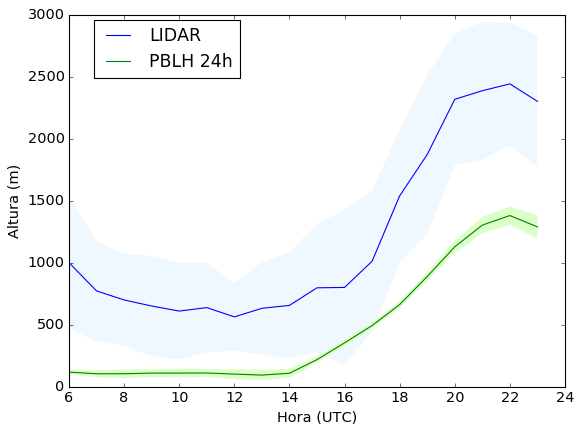

In [8]:
h_range= range(6,24)
plt.figure(figsize=(8,6))
#plt.plot(h_range, B)
plt.fill_between(h_range, month_avg[:,0] - month_avg[:,1], month_avg[:,0] + month_avg[:,1], facecolor='#F0F8FF', alpha=1.0, edgecolor='none')
plt.plot(h_range, month_avg[:,0], label = 'LIDAR')
plt.fill_between(h_range, month_avg[:,6] - month_avg[:,7], month_avg[:,6] + month_avg[:,7], facecolor=h24_color, alpha=1.0, edgecolor='none')
plt.plot(h_range, month_avg[:,6], c = 'g', label='PBLH 24h')
plt.ylabel('Altura (m)')
plt.xlabel('Hora (UTC)')
plt.legend(loc=(0.05,0.83))
plt.rcParams.update({'font.size': 13})

##### Gráfica de ceilo en pormediado en el intervalo  y PBLH con promedio espacial a coordenada más cercana al CCA

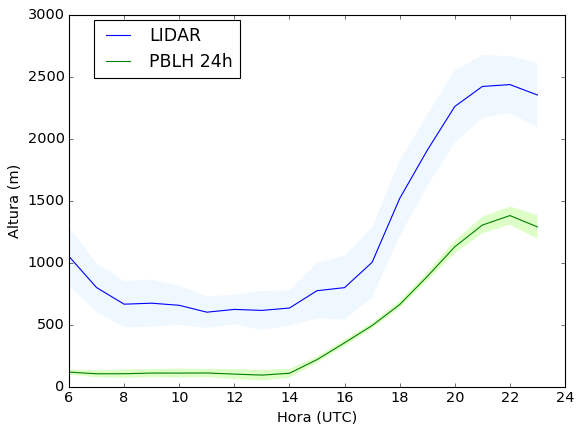

In [9]:
h_range= range(6,24)
plt.figure(figsize=(8,6))
#plt.plot(h_range, B)
plt.fill_between(h_range, month_avg[:,2] - month_avg[:,3], month_avg[:,2] + month_avg[:,3], facecolor='#F0F8FF', alpha=1.0, edgecolor='none')
plt.plot(h_range, month_avg[:,2], label = 'LIDAR')
plt.fill_between(h_range, month_avg[:,6] - month_avg[:,7], month_avg[:,6] + month_avg[:,7], facecolor=h24_color, alpha=1.0, edgecolor='none')
plt.plot(h_range, month_avg[:,6], c = 'g', label='PBLH 24h')
#plt.title('Promedios mensuales, espaciales y temporales en diciembre ')
plt.ylabel('Altura (m)')
plt.xlabel('Hora (UTC)')
plt.legend(loc=(0.05,0.83))

### 48 h

In [10]:
month_avg[:,11]

array([  27.354,   27.736,   29.775,   34.625,   29.282,   32.272,
         43.169,   42.184,   39.893,   33.757,   29.216,   28.28 ,
         36.882,   46.213,   55.531,   95.767,   81.328,  106.991])

#### ceilo promedio en hora y pblh en 1 coord. 

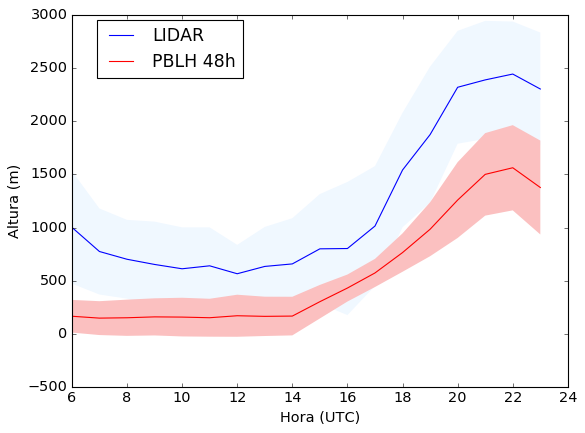

In [11]:
h_range= range(6,24)
plt.figure(figsize=(8,6))
#plt.plot(h_range, B)
#ceilo
plt.fill_between(h_range, month_avg[:,0] - month_avg[:,1], month_avg[:,0] + month_avg[:,1], facecolor=ceilo_color, alpha=1.0, edgecolor='none')
plt.plot(h_range, month_avg[:,0], label = 'LIDAR')
#48h
plt.fill_between(h_range, month_avg[:,8] - month_avg[:,9], month_avg[:,8] + month_avg[:,9], facecolor=h48_color, alpha=1.0, edgecolor='none')
plt.plot(h_range, month_avg[:,8], c = 'r', label='PBLH 48h')
plt.ylabel('Altura (m)')
plt.xlabel('Hora (UTC)')
plt.legend(loc=(0.05,0.83))
plt.rcParams.update({'font.size': 13})
plt.savefig('ceilo_h_pblh_1coord')

#### ceilo promedio 1 h y pblh promedio espacial 

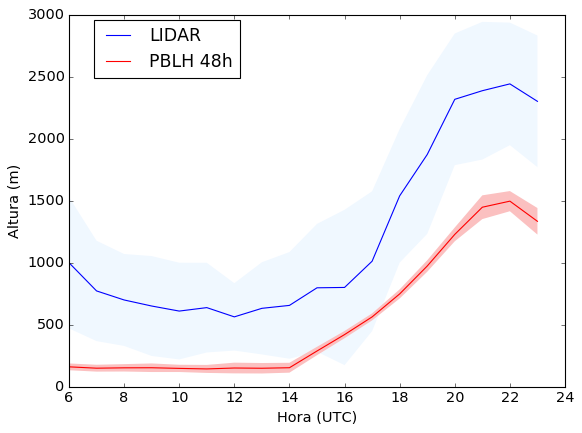

In [12]:
h_range= range(6,24)
plt.figure(figsize=(8,6))
#plt.plot(h_range, B)
#ceilo
plt.fill_between(h_range, month_avg[:,0] - month_avg[:,1], month_avg[:,0] + month_avg[:,1], facecolor=ceilo_color, alpha=1.0, edgecolor='none')
plt.plot(h_range, month_avg[:,0], label = 'LIDAR')
#48h
plt.fill_between(h_range, month_avg[:,10] - month_avg[:,11], month_avg[:,10] + month_avg[:,11], facecolor=h48_color, alpha=1.0, edgecolor='none')
plt.plot(h_range, month_avg[:,10], c = 'r', label='PBLH 48h')
plt.ylabel('Altura (m)')
plt.xlabel('Hora (UTC)')
plt.legend(loc=(0.05,0.83))
plt.rcParams.update({'font.size': 13})

#### ceilo promedio en intervalo de tiempo y pblh en 1 coord. 

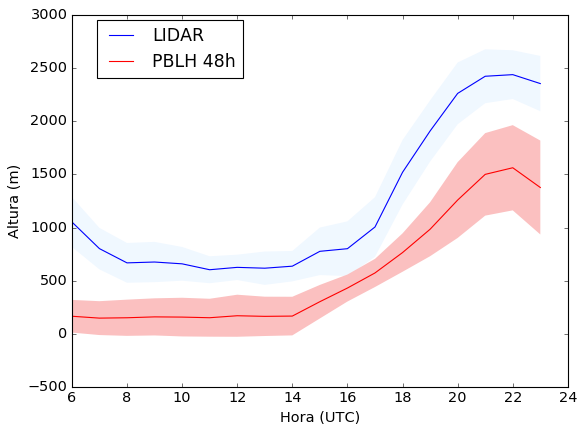

In [13]:
h_range= range(6,24)
plt.figure(figsize=(8,6))
#plt.plot(h_range, B)
#ceilo
plt.fill_between(h_range, month_avg[:,2] - month_avg[:,3], month_avg[:,2] + month_avg[:,3], facecolor=ceilo_color, alpha=1.0, edgecolor='none')
plt.plot(h_range, month_avg[:,2], label = 'LIDAR')
#48h
plt.fill_between(h_range, month_avg[:,8] - month_avg[:,9], month_avg[:,8] + month_avg[:,9], facecolor=h48_color, alpha=1.0, edgecolor='none')
plt.plot(h_range, month_avg[:,8], c = 'r', label='PBLH 48h')
plt.ylabel('Altura (m)')
plt.xlabel('Hora (UTC)')
plt.legend(loc=(0.05,0.83))
plt.rcParams.update({'font.size': 13})

#### ceilo promedio en intervalo de tiempo y pblh promedio en el espacio

<function matplotlib.pyplot.savefig>

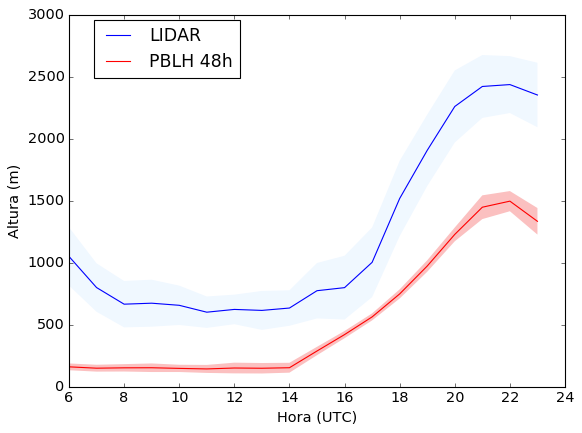

In [14]:
h_range= range(6,24)
plt.figure(figsize=(8,6))
#plt.plot(h_range, B)
#ceilo
plt.fill_between(h_range, month_avg[:,2] - month_avg[:,3], month_avg[:,2] + month_avg[:,3], facecolor=ceilo_color, alpha=1.0, edgecolor='none')
plt.plot(h_range, month_avg[:,2], label = 'LIDAR')
#48h
plt.fill_between(h_range, month_avg[:,10] - month_avg[:,11], month_avg[:,10] + month_avg[:,11], facecolor=h48_color, alpha=1.0, edgecolor='none')
plt.plot(h_range, month_avg[:,10], c = 'r', label='PBLH 48h')
plt.ylabel('Altura (m)')
plt.xlabel('Hora (UTC)')
plt.legend(loc=(0.05,0.83))
plt.rcParams.update({'font.size': 13})
plt.savefig

------

# Gunshot plots

In [48]:
file_dic_24 = sio.loadmat('/Users/claudiopierard/WRF/Datos/WRF/dic/12_24hrs_D2.mat')
dic_24 = blt.import_var_mat(file_dic_24, 'Atmos')

dt_ceilo, raw_ceilo, filt_ceilo = blt.read_ceilometro_month("/Users/claudiopierard/WRF/Datos/ceilometro/2015_utc/dic_2015_utc.dat")

In [50]:
np.zeros_like(dt_ceilo)

array([0, 0, 0, ..., 0, 0, 0], dtype=object)

In [52]:
import time

In [57]:
datenums = []

for dt in dt_ceilo:
    datenums.append(time.mktime(dt.timetuple()))

datenums = np.array(datenums)

In [60]:
datenums.shape

(3744,)

In [61]:
raw_ceilo.shape

(3744,)

In [62]:
ceilo_datos = np.zeros((len(raw_ceilo), 3))

In [64]:
ceilo_datos[:,0] = datenums
ceilo_datos[:,1] = raw_ceilo
ceilo_datos[:,2] = filt_ceilo

In [65]:
ceilo_datos

array([[  1.44894960e+09,   2.02000000e+03,   2.02000000e+03],
       [  1.44895020e+09,   2.00000000e+03,   2.00000000e+03],
       [  1.44895080e+09,   2.48000000e+03,   2.48000000e+03],
       ..., 
       [  1.45162620e+09,   2.78000000e+03,   2.78000000e+03],
       [  1.45162680e+09,   2.74000000e+03,   2.74000000e+03],
       [  1.45162740e+09,   2.75000000e+03,   2.75000000e+03]])

In [70]:
t_init = time.mktime(datetime.datetime(2015, 1, 1, 0, 0).timetuple())

In [71]:
t_end =  time.mktime(datetime.datetime(2015, 12, 31, 23, 50).timetuple())

In [72]:
t_range = np.linspace(t_init, t_end, (t_end - t_init)/600)

In [95]:
t_range

array([  1.42009200e+09,   1.42009260e+09,   1.42009320e+09, ...,
         1.45162620e+09,   1.45162680e+09,   1.45162740e+09])

In [75]:
len(t_range)

52559

In [83]:
np.array(['nan', 'nan', 'nan'])

array(['nan', 'nan', 'nan'], 
      dtype='<U3')

In [93]:
ceilo_complete = np.zeros((len(t_range), 3))

for i in range(0, len(t_range)):
    c = 0
    for j in range(0, len(ceilo_datos[:,0])):
        if t_range[i] == ceilo_datos[j, 0]:
            ceilo_complete[i, :] = ceilo_datos[j,:]
            c += 1
            
    #if c == 0:
    #    ceilo_complete[i, :] = np.array(['nan', 'nan', 'nan'])
            
ceilo_complete[:, 0] = t_range  

In [94]:
ceilo_complete

array([[  1.42009200e+09,   0.00000000e+00,   0.00000000e+00],
       [  1.42009260e+09,   0.00000000e+00,   0.00000000e+00],
       [  1.42009320e+09,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  1.45162620e+09,   0.00000000e+00,   0.00000000e+00],
       [  1.45162680e+09,   0.00000000e+00,   0.00000000e+00],
       [  1.45162740e+09,   2.75000000e+03,   2.75000000e+03]])

In [ ]:
for i in ce

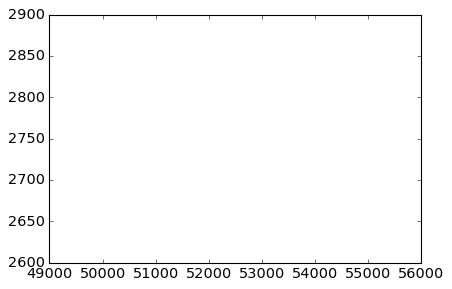

In [90]:
plt.plot(ceilo_complete[:,])

In [79]:
ceilo_complete[:, 0] = t_range

In [81]:
ceilo_complete.shape

(52559, 3)

In [ ]:
ceilo

In [ ]:
t_range = np.linspace()

In [59]:
len(dt_ceilo)

3744

In [135]:
def search_hour_oclock(DT, RAW):
    indexes = []
    for i in range(0, len(DT)):
        if DT[i].minute == 0 and np.isnan(RAW[i]) == False and DT[i].hour >= 6:
            indexes.append(i)
    return indexes

In [136]:
nxx = search_hour_oclock(dt_ceilo, raw_ceilo);

In [141]:
for i in nxx:
    print(dt_ceilo[i].hour)

6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


In [137]:
len(nxx)

468

In [138]:
468/24

19.5

In [24]:
dt_ceilo[nxx[24]]

datetime.datetime(2015, 12, 2, 0, 0)

In [25]:
dt_ceilo[nxx[3]].day

1

In [26]:
dic_24['PBLH'].shape

(3, 3, 24, 30)

In [27]:
hour = 0
day = 30 -1
dic_24['PBLH'][1,1, hour, day]

0.0

In [28]:
dt_ceilo[3699].day

31

In [29]:
dic_24['PBLH_avg'][0, 3, 5]

373.03696

In [145]:
def ceilo_vs_wrf(DT, RAW, PBLH, PBLH_avg):
    wrf = []
    wrf_avg = []
    ceilo = []
    ceilo_avg = []
    colormap_index = []
    indexes = search_hour_oclock(DT,RAW)
    print('indexes ceilo = ', len(indexes))
    for i in indexes:
        intervalo_hora = []
        hour = DT[i].hour
        day = DT[i].day - 1
        if (day) == PBLH.shape[3]:
            break
        
        if hour == 0 and day ==0:
            intervalo_hora.append(RAW[i])
        else:
            for j in range(-3, 4):
                intervalo_hora.append(RAW[i + j])
        if hour >= 0 and hour < 6:
            colormap_index.append(np.random.randint(0,6))
            print(hour)
        elif hour >= 6 and hour < 12:
            colormap_index.append(np.random.randint(6,12))
        elif hour >= 12 and hour < 18:
            colormap_index.append(np.random.randint(12,18))
        elif hour >= 18 and hour < 24:
            colormap_index.append(np.random.randint(18,24))
        
        #print(hour)
        wrf.append(PBLH[1,1, hour, day])
        wrf_avg.append(PBLH_avg[0, hour, day])
        ceilo.append(RAW[i])
        ceilo_avg.append(np.mean(intervalo_hora))
        
    wrf = np.array(wrf)
    wrf_avg = np.array(wrf_avg)
    ceilo = np.array(ceilo)
    ceilo_avg = np.array(ceilo_avg)
    colormap_index = np.array(colormap_index)
    return ceilo, ceilo_avg, wrf, wrf_avg, colormap_index

In [146]:
ceilo_month, ceilo_avg_month, pblh_month, pblh_avg_month, cm_month = ceilo_vs_wrf(dt_ceilo, raw_ceilo, dic_24['PBLH'], dic_24['PBLH_avg'])

indexes ceilo =  468


In [147]:
cm_month.shape

(450,)

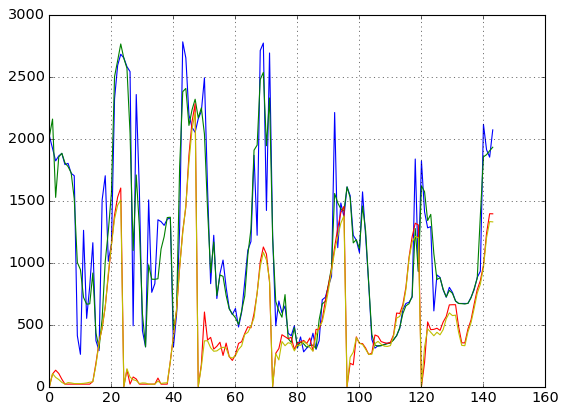

In [116]:
dias = 144
plt.figure(figsize=(8,6))
plt.plot(ceilo_month[0:dias])
plt.plot(ceilo_avg_month[0:dias], c='g')
plt.plot(pblh_month[0:dias], c='r')
plt.plot(pblh_avg_month[0:dias], c='y')
plt.grid()

In [117]:
np.random.randint(6,12)

9

In [118]:
holo = np.random.randint(6,24,600)

In [119]:
ceilo_month[450:]

array([ 1395.,  2600.,  2310.,  2560.,  2940.,  1700.,  2570.,  2400.,
        2510.,  2560.,   290.,   290.,   280.,   510.,   400.,   260.,
        1470.,   320.,   320.,   350.,  1600.,   280.,   360.,   500.,
         730.,  1915.,  2115.,  2600.,  2100.,  2995.,  2325.,  1690.,
        2360.,  2650.,  1270.,  1340.,   930.,   920.,   480.,   520.,
         290.,   500.,   420.,   410.,   460.,   430.,  1580.,   290.,
        1785.,  1715.,  2805.,  2895.,  2705.,  2190.,  2615.,  2080.,
         440.,  2260.,  2000.,  2120.,  1330.,  1510.,  1350.,  1420.,
        1740.,  1330.,   570.,   955.,  1140.,  1255.,   430.,  1460.,
        2175.,  2290.,  1835.,  2285.,  2650.,  3370.,  1690.,  2580.,
         330.,  1510.,   590.,   570.,   570.,   580.,   560.,   985.,
         580.,   460.,  1025.,   340.,   300.,   420.,  1360.,   430.,
        2210.,  1820.,  2280.,  2550.,  3040.,  2240.,  1815.,   290.,
         340.,   580.,   500.,   500.,   610.,   450.,   430.,   470.,
      

In [142]:
cm_month

array([ 4,  3,  1,  1,  1,  3,  9,  9,  8,  7,  9, 10, 12, 15, 12, 15, 16,
       15, 22, 20, 19, 22, 18, 18,  5,  1,  3,  0,  2,  5, 11,  7,  7,  8,
        8, 10, 13, 17, 13, 13, 17, 15, 23, 20, 18, 23, 21, 22,  0,  5,  3,
        3,  0,  3, 10,  7,  9,  6,  9,  8, 12, 14, 12, 14, 15, 12, 19, 21,
       19, 18, 22, 23,  1,  2,  1,  4,  5,  2, 11, 10,  7,  6, 11, 11, 13,
       16, 13, 15, 14, 17, 21, 21, 19, 23, 20, 21,  2,  2,  5,  2,  0,  4,
       10,  7, 11,  9,  8,  6, 15, 12, 16, 12, 13, 13, 20, 19, 22, 23, 22,
       23,  4,  1,  0,  4,  0,  1, 11,  7, 11,  8,  7,  7, 12, 16, 14, 15,
       17, 12, 21, 18, 18, 18, 20, 20,  0,  4,  2,  0,  5,  1,  6, 11,  6,
       11,  8, 11, 14, 12, 17, 13, 13, 16, 23, 20, 21, 23, 21, 22,  0,  5,
        5,  5,  3,  0, 10,  7,  6,  8,  7, 11, 17, 13, 13, 15, 15, 16, 19,
       19, 22, 20, 18, 20,  5,  5,  0,  5,  3,  4, 11,  9, 10,  7,  6,  9,
       17, 12, 14, 16, 12, 13, 21, 21, 22, 20, 21, 18,  4,  3,  0,  3,  0,
        1,  7,  8,  7, 11

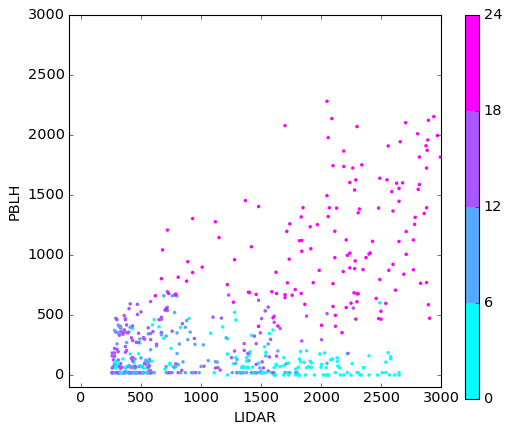

In [127]:
import matplotlib
# setup the plot
fig, ax = plt.subplots(1,1, figsize=(6,6))

# define the data
x = ceilo_month#[0:450]
y = pblh_month#[0:450]
tag = cm_month#[0:450]
#tag[10:12] = 0 # make sure there are some 0 values to showup as grey

# define the colormap
cmap = plt.cm.cool
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# force the first color entry to be grey
#cmaplist[0] = (.5,.5,.5,1.0)
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
#cmaplist[0] = (.5,.5,.5,1.0)
# define the bins and normalize
bounds = np.linspace(0,24, 5)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

# make the scatter
scat = ax.scatter(x,y, cmap=cmap, norm=norm, c=tag, edgecolors='none', s = 10)

# create a second axes for the colorbar
ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])
cb = matplotlib.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm, spacing='proportional', ticks=bounds, boundaries=bounds, format='%1i')
ax.set_ylim(-100, 3000)
ax.set_xlim(-100, 3000)
ax.set_xlabel('LIDAR')
ax.set_ylabel('PBLH')
#ax.set_title('Well defined discrete colors')
#ax2.set_ylabel('Very custom cbar [-]', size=12)

In [ ]:
popt, pcov = optimization.curve_fit(x, y)

In [38]:
cm_month[0:400]

array([ 9,  8, 11, 11, 11,  6, 17, 17, 13, 14, 12, 12, 18, 22, 19, 23, 23,
       22,  6,  9,  9,  9, 11,  7, 15, 17, 14, 17, 16, 12, 19, 22, 18, 20,
       21, 18,  8,  8,  9,  6,  6,  9, 13, 17, 16, 12, 17, 12, 20, 23, 20,
       20, 23, 19,  8,  8, 10, 10, 11,  7, 16, 17, 14, 13, 12, 17, 19, 21,
       22, 22, 18, 21,  7,  6,  7,  8, 10,  6, 12, 17, 12, 16, 12, 16, 19,
       21, 20, 18, 22, 22,  8,  8,  8,  6,  7,  8, 12, 15, 16, 14, 16, 17,
       18, 21, 23, 20, 20, 20, 11, 11,  6, 11, 11,  9, 12, 15, 14, 16, 14,
       17, 20, 23, 20, 21, 22, 23,  9,  6,  8,  9, 10,  8, 12, 15, 17, 15,
       15, 17, 23, 19, 22, 21, 23, 21,  6,  7,  9,  6,  9, 11, 15, 12, 13,
       17, 12, 12, 22, 22, 18, 18, 22, 22, 10,  9, 11, 11,  8,  9, 13, 17,
       13, 14, 15, 14, 22, 18, 20, 23, 18, 19,  7,  9,  8, 11, 11,  8, 17,
       16, 12, 17, 16, 13, 21, 21, 19, 21, 23, 21,  8, 11,  6,  7, 10,  7,
       16, 12, 17, 17, 14, 14, 23, 23, 21, 20, 23, 23,  8, 10,  7,  9, 11,
        8, 13, 14, 15, 14

In [39]:
cm_month[400:600]

array([ 6,  8, 14, 16, 12, 17, 16, 17, 19, 20, 18, 21, 19, 21, 10,  7,  8,
       11, 10, 11, 15, 15, 14, 16, 12, 13, 21, 19, 21, 21, 22, 20,  9,  6,
       10, 10,  6,  8, 14, 12, 12, 16, 13, 14, 21, 20, 19, 20, 21, 20])

In [40]:
22*24


528